In [213]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Уровень доверия

In [214]:
def get_normal_samples(n):
    k = 50
    norm_rv = sps.norm(loc=10, scale=2)
    samples = []
    for i in range(k):
        samples.append(norm_rv.rvs(size=n))
    
    return np.array(samples)

In [215]:
def get_means(samples):
    means = []
    for i in range(len(samples)):
        means.append(samples[i].mean())
    
    return np.array(means)

In [216]:
def get_borders(means, p):
    norm_rv = sps.norm(0, 1)
    fp = norm_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - fp*(2/np.sqrt(10)))
        right.append(means[i] + fp*(2/np.sqrt(10)))

    return np.array(left), np.array(right)

In [217]:
norm_rv = sps.norm(0, 1)
list(map(lambda x: np.round(x, 3), norm_rv.ppf([0.95, 0.995, 0.9995])))

[1.645, 2.576, 3.291]

In [218]:
samples = get_normal_samples(10)
means = get_means(samples)
df = pd.DataFrame(samples)
df['mean'] = means
left, right = get_borders(means, 0.95)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,8.796034,12.577313,9.169032,12.146380,10.149452,10.366733,11.636087,10.547240,11.729938,11.196611,10.831482,9.791185,11.871779
1,15.878871,7.835526,10.879149,8.427478,10.771513,12.509154,9.653525,11.255292,7.575042,8.763286,10.354884,9.314587,11.395180
2,10.457357,9.165940,14.641563,9.250837,9.870098,12.459900,13.000371,11.840354,8.500786,9.109959,10.829716,9.789419,11.870013
3,8.954894,9.402055,8.743635,5.592144,6.616506,9.642736,9.777207,8.252616,11.072555,9.790453,8.784480,7.744183,9.824777
4,10.103763,9.211668,11.576075,11.049011,10.478070,9.341828,8.806858,9.025322,9.846815,13.629067,10.306848,9.266551,11.347144


In [219]:
def draw_borders(left, right):
    x = np.arange(len(left))
    plt.plot(x, left, label='a1')
    plt.plot(x, right, label='a2')
    plt.scatter(x, left, s=15)
    plt.scatter(x, right, s=15)
    plt.xlabel('Номер элемента')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend()

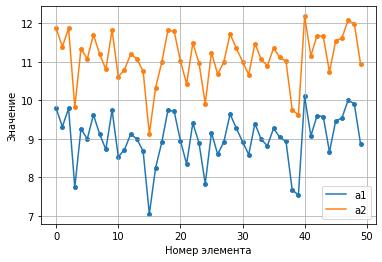

In [220]:
draw_borders(left, right)

In [221]:
left, right = get_borders(means, 0.995)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,8.796034,12.577313,9.169032,12.146380,10.149452,10.366733,11.636087,10.547240,11.729938,11.196611,10.831482,9.202385,12.460580
1,15.878871,7.835526,10.879149,8.427478,10.771513,12.509154,9.653525,11.255292,7.575042,8.763286,10.354884,8.725786,11.983981
2,10.457357,9.165940,14.641563,9.250837,9.870098,12.459900,13.000371,11.840354,8.500786,9.109959,10.829716,9.200619,12.458814
3,8.954894,9.402055,8.743635,5.592144,6.616506,9.642736,9.777207,8.252616,11.072555,9.790453,8.784480,7.155383,10.413578
4,10.103763,9.211668,11.576075,11.049011,10.478070,9.341828,8.806858,9.025322,9.846815,13.629067,10.306848,8.677750,11.935945


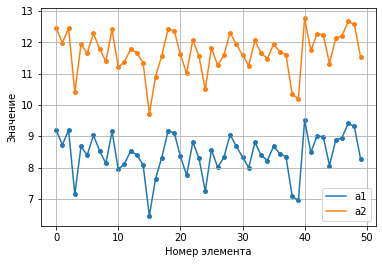

In [222]:
draw_borders(left, right)

In [223]:
left, right = get_borders(means, 0.9995)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,8.796034,12.577313,9.169032,12.146380,10.149452,10.366733,11.636087,10.547240,11.729938,11.196611,10.831482,8.750370,12.912594
1,15.878871,7.835526,10.879149,8.427478,10.771513,12.509154,9.653525,11.255292,7.575042,8.763286,10.354884,8.273772,12.435995
2,10.457357,9.165940,14.641563,9.250837,9.870098,12.459900,13.000371,11.840354,8.500786,9.109959,10.829716,8.748604,12.910828
3,8.954894,9.402055,8.743635,5.592144,6.616506,9.642736,9.777207,8.252616,11.072555,9.790453,8.784480,6.703368,10.865592
4,10.103763,9.211668,11.576075,11.049011,10.478070,9.341828,8.806858,9.025322,9.846815,13.629067,10.306848,8.225736,12.387959


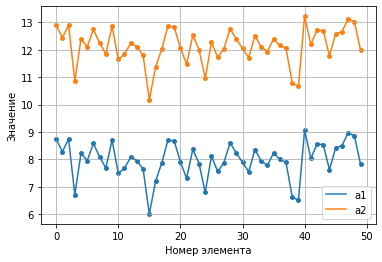

In [224]:
draw_borders(left, right)

## Интервалы для среднего нормальной совокупности

In [225]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(20)
mean = sample.mean()

ps = [0.8, 0.9, 0.95, 0.98, 0.99, 0.999]
ps = list(map(lambda x: (1+x)/2, ps))
left, right = [], []
for p in ps:
    fp = sps.norm(0,1).ppf(p)
    left.append(mean - fp*(2/np.sqrt(20)))
    right.append(mean + fp*(2/np.sqrt(20)))
    
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
df

,left,right
0.9000,9.946656,11.092911
0.9500,9.784182,11.255384
0.9750,9.643261,11.396306
0.9900,9.479409,11.560158
0.9950,9.367837,11.671729
0.9995,9.048215,11.991352


## Задача

n=20, Pд=0.99, a=300

In [226]:
N = 10000
a = 300
n = 20
uni_rv = sps.uniform(loc=a)
sample = uni_rv.rvs(n)
sample

array([300.54615979, 300.77803334, 300.83130746, 300.9250502 ,
       300.0340823 , 300.41632795, 300.16735719, 300.23033225,
       300.27512171, 300.911751  , 300.31812532, 300.78771589,
       300.66550003, 300.48820266, 300.97370421, 300.21128091,
       300.60881408, 300.55729958, 300.65598257, 300.44707071])

In [227]:
Pd = 0.99
mean = sample.mean()
chi2_rv = sps.chi2(df=2*n)
t1, t2 = chi2_rv.ppf((1-Pd)/2), chi2_rv.ppf((1+Pd)/2)
print(t1, t2)
a1, a2 = 2*n*mean / t2, 2*n*mean / t1
print('Доверительный интервал для a ({:.2f}, {:.2f})'.format(a1, a2))

m1, m2 = N*(1 - np.exp(-50/a2)), N*(1 - np.exp(-50/a1))
print('Доверительный интервал для M ({:.2f}, {:.2f})'.format(m1, m2))

20.706535316970086 66.76596183280391
Доверительный интервал для a (180.06, 580.57)
Доверительный интервал для M (825.18, 2424.69)
